In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir voter_tampering
!mkdir voter_tampering/image

In [3]:
# Open image and display
original = Image.open(requests.get('https://www.godigit.com/content/dam/godigit/directportal/en/contenthm/how-to-appy-for-voter-id.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://3.bp.blogspot.com/-wh2MhHmeQTk/XIuy7SjkQOI/AAAAAAAAAQM/enN61w15l50aTkgyvoItzC7FWgpSGlfZQCLcBGAs/w680/20190315_125020.png', stream=True).raw)

In [4]:
# The file format of the source file.
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1146, 860)
Tampered image size :  (680, 1145)


In [9]:
# Resizeage
original = original.resize((250, 160))
print(original.size)
original.save('voter_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('voter_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


In [10]:
# Change image type if required from png to jpg
tampered = Image.open('voter_tampering/image/tampered.png')
tampered.save('voter_tampering/image/tampered.png')#can do png to jpg

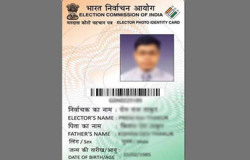

In [11]:
 #Display original image
original

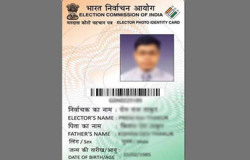

In [12]:
# Display original image
original

In [13]:
# load the two input images
original = cv2.imread('voter_tampering/image/original.png')
tampered = cv2.imread('voter_tampering/image/tampered.png')

In [14]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [15]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.17315715199168907


In [16]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [17]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


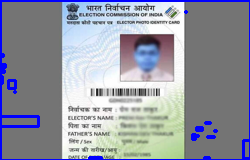

In [18]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


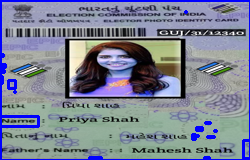

In [19]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


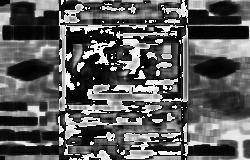

In [20]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


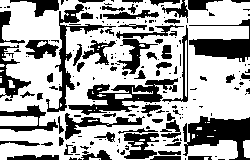

In [21]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)